### Import Library

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

### Read Datasest

In [16]:
data_dir = './dataset credit-approval/Datasets_Dummy_CreditApproval-v3.csv'
with open(data_dir, 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

ï»¿;approval;gender;usia;pinjaman;tenor;pemasukan;tanggungan;pekerjaan;donasi

Each data point looks like this:

0;N;M;53;1800000;6;1500000;1;Buruh;0



In [17]:
df  = pd.read_csv(data_dir, delimiter=';')
df.head()

,Unnamed: 0,approval,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,0,N,M,53,1800000,6,1500000,1,Buruh,0
1,1,Y,M,61,500000,4,3500000,0,Guru/Dosen,3
2,2,N,M,33,1000000,6,1200000,0,Pedagang,6
3,3,N,M,37,1200000,16,1800000,5,Pekerja Lepas,5
4,4,Y,F,36,1200000,10,4600000,1,Buruh,4


In [18]:
data = df.drop('Unnamed: 0', axis=1)
data.head()

,approval,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,N,M,53,1800000,6,1500000,1,Buruh,0
1,Y,M,61,500000,4,3500000,0,Guru/Dosen,3
2,N,M,33,1000000,6,1200000,0,Pedagang,6
3,N,M,37,1200000,16,1800000,5,Pekerja Lepas,5
4,Y,F,36,1200000,10,4600000,1,Buruh,4


### Change Categorical to Numeric Value

In [19]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [20]:
categorical_features = ['approval', 'gender','pekerjaan']
Cat_to_Num(categorical_features)

approval --> {'N': 0, 'Y': 1}
gender --> {'F': 0, 'M': 1}
pekerjaan --> {'Buruh': 0, 'Guru/Dosen': 1, 'Pedagang': 2, 'Pekerja Lepas': 3, 'Wirausaha': 4}


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   approval    10000 non-null  int64
 1   gender      10000 non-null  int64
 2   usia        10000 non-null  int64
 3   pinjaman    10000 non-null  int64
 4   tenor       10000 non-null  int64
 5   pemasukan   10000 non-null  int64
 6   tanggungan  10000 non-null  int64
 7   pekerjaan   10000 non-null  int64
 8   donasi      10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


### Define labels and features

In [22]:
labels = data['approval']
features = data.drop('approval', axis=1)

In [23]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = features[col_features].astype('int64')

In [24]:
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,1,53,1800000,6,1500000,1,0,0
1,1,61,500000,4,3500000,0,1,3
2,1,33,1000000,6,1200000,0,2,6
3,1,37,1200000,16,1800000,5,3,5
4,0,36,1200000,10,4600000,1,0,4


### Normalize Data

In [25]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [26]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 
                'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,1.0,0.4125,0.52,0.176471,0.078947,0.2,0.00,0.000
1,1.0,0.5125,0.00,0.058824,0.605263,0.0,0.25,0.375
2,1.0,0.1625,0.20,0.176471,0.000000,0.0,0.50,0.750
3,1.0,0.2125,0.28,0.764706,0.157895,1.0,0.75,0.625
4,0.0,0.2000,0.28,0.411765,0.894737,0.2,0.00,0.500


### Train & Test split

In [27]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, labels, test_size=0.3, shuffle=True, stratify=labels, random_state=42)

# % of training set
len(X_train)/len(features)

0.7

In [28]:
X_train.head()

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
2345,1.0,0.7250,0.56,0.411765,0.210526,0.0,0.50,0.250
9346,1.0,0.9000,0.36,0.529412,0.078947,0.4,0.25,0.375
138,0.0,0.9250,0.08,0.176471,0.000000,1.0,0.50,0.125
1967,0.0,0.7375,0.36,0.294118,0.000000,0.4,0.25,0.625
4148,0.0,0.8125,0.40,0.411765,0.342105,0.4,0.25,0.125


In [29]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

In [30]:
print(y_train.shape, y_validate.shape)
print(y_train.shape, y_validate.shape)

(7000,) (3000,)
(7000,) (3000,)


## Create TF Model

In [31]:
def create_model():
    
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu", input_shape=X_train[0].shape),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])


    return model

In [32]:
mc = ModelCheckpoint('creditapproval_model_v3_02.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [33]:
model = create_model()

history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size = 32,
                    callbacks = [mc],
                    validation_data=(X_validate, y_validate))

Epoch 1/300
216/219 [============================>.] - ETA: 0s - loss: 0.7351 - accuracy: 0.4638
Epoch 1: val_accuracy improved from -inf to 0.49000, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 3s 4ms/step - loss: 0.7351 - accuracy: 0.4633 - val_loss: 0.7103 - val_accuracy: 0.4900
Epoch 2/300
215/219 [============================>.] - ETA: 0s - loss: 0.6956 - accuracy: 0.5365
Epoch 2: val_accuracy improved from 0.49000 to 0.56133, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.5379 - val_loss: 0.6845 - val_accuracy: 0.5613
Epoch 3/300
208/219 [===========================>..] - ETA: 0s - loss: 0.6738 - accuracy: 0.5879
Epoch 3: val_accuracy improved from 0.56133 to 0.61467, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 3ms/step - loss: 0.6731 - accuracy: 0.5896 - val_loss: 0.6632 - val_accuracy: 0.6147
Epoch 4/300
2

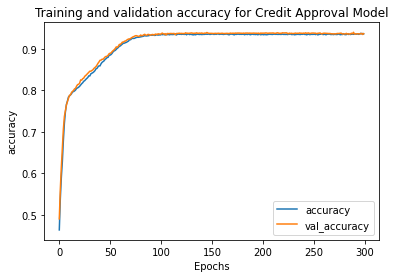

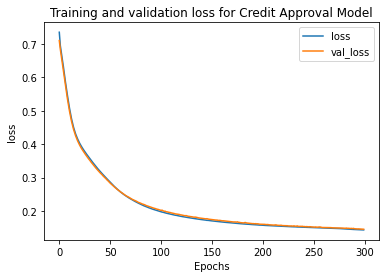

In [35]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.title(f'Training and validation {metric} for Credit Approval Model')
    plt.show()
    
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")